In [2]:
import numpy as np
import sympy
from sympy.utilities.lambdify import lambdify
from utils import *
from function_writers import *
from unidirectional_search import *
from global_definitions import *
from plotting import *
from newton import newton
from gradient import gradient_method
from conjugate_gradient import conjugate_gradient
from dfp import dfp
from bfgs import bfgs

table_header = ['x', 'Objective', 'alpha']

# Nonlinear Optimization Algorithms

This project contains an implementation of five different algorithms for nonlinear optimization: gradient, conjugate-gradient, newton, dfp, and bfgs. Each algorithm can be used with exact (golden section) and inexact (armijo with qualification criteria) line search methods. To swap between line search methods, simply change the commented line on the respective cell for your desired algorithm. You may also choose a larger value for n.

Three functions are originally available, but you may write your own following the example of the provided ones.

Gradient and Hessian calculates are obtained dynamically, using the Sympy package. Therefore, you do not need to provide those yourself.

# Function definitions

In [3]:
n = 2
variable_string = write_variable_string(n)
x = sympy.Matrix(sympy.symbols(variable_string))

fn = write_fn1(x, n)
#fn = write_fn2(x, n)
# n = 2 # n has to be 2 for this function.
#fn = write_fn3(x)

# Lambdifying functions and setting initial x for all methods

In [4]:
lambdified_fn = lambdify(x, fn)
lambdified_grad = compute_gradient(fn, x)
print(f'The chosen function is: {fn}')

initial_x = [0 for _ in range(n)]

The chosen function is: (1 - x0)**2 + 100*(-x0**2 + x1)**2


# Gradient Method

In [5]:
x_values, obj_values, alphas = gradient_method(lambdified_fn, lambdified_grad, initial_x, armijo_search)
#x_values, obj_values, alphas = gradient_method(lambdified_fn, lambdified_grad, initial_x, exact_search)


---------------- ITERATION 0 Obj: 1 x: [0, 0]----------------
---------------- ITERATION 1 Obj: 0.9223761142488893 x: [0.24315331 0.        ]----------------
---------------- ITERATION 2 Obj: 0.8628192451102905 x: [0.20987301 0.09288505]----------------
---------------- ITERATION 3 Obj: 0.7920540095333937 x: [0.2544919  0.01615834]----------------
---------------- ITERATION 4 Obj: 0.7638105379445776 x: [0.22733581 0.0925228 ]----------------
---------------- ITERATION 5 Obj: 0.7268228554245472 x: [0.26864769 0.02835986]----------------
---------------- ITERATION 6 Obj: 0.717706961842939 x: [0.24315561 0.09718954]----------------
---------------- ITERATION 7 Obj: 0.7003112695874742 x: [0.28412789 0.03738833]----------------
---------------- ITERATION 8 Obj: 0.6468319477232872 x: [0.259427   0.09866852]----------------
---------------- ITERATION 9 Obj: 0.5990563011053813 x: [0.29290912 0.05431897]----------------
---------------- ITERATION 10 Obj: 0.5721973754653169 x: [0.27683448 0.0988

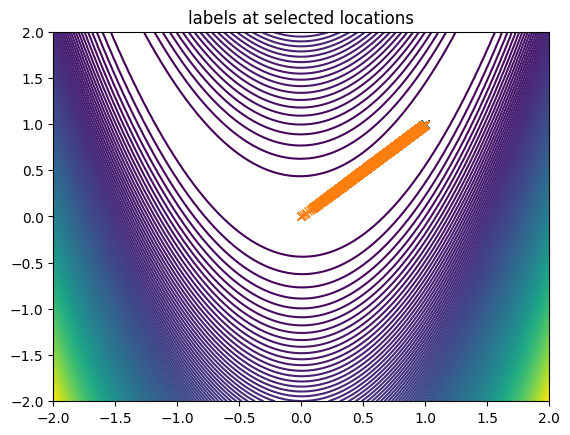

Iteration 		x 		Objective 		Alpha
0 	[0, 0] 	1 	None
1 	[0.24315331 0.        ] 	1 	0.12157665459056936
2 	[0.20987301 0.09288505] 	0.9223761142488893 	0.00785516721127895
3 	[0.2544919  0.01615834] 	0.8628192451102905 	0.00785516721127895
4 	[0.22733581 0.0925228 ] 	0.7920540095333937 	0.00785516721127895
5 	[0.26864769 0.02835986] 	0.7638105379445776 	0.00785516721127895
6 	[0.24315561 0.09718954] 	0.7268228554245472 	0.00785516721127895
7 	[0.28412789 0.03738833] 	0.717706961842939 	0.00785516721127895
8 	[0.259427   0.09866852] 	0.7003112695874742 	0.007069650490151055
9 	[0.29290912 0.05431897] 	0.6468319477232872 	0.007069650490151055
10 	[0.27683448 0.09882494] 	0.5990563011053813 	0.007069650490151055
11 	[0.30442909 0.06745321] 	0.5721973754653169 	0.007069650490151055
12 	[0.29254919 0.10311799] 	0.5474432062162782 	0.007069650490151055
13 	[0.31705686 0.07832761] 	0.5312271231345436 	0.007069650490151055
14 	[0.30681114 0.10971324] 	0.5156839897301946 	0.007069650490151055
1

In [6]:
plot_travel_path_countour(x_values, lambdified_fn)

pretty_output(x_values, obj_values, alphas)

# Conjugate Gradient

In [7]:
x_values, obj_values, alphas = conjugate_gradient(lambdified_fn, lambdified_grad, initial_x, armijo_search)
#x_values, obj_values, alphas = conjugate_gradient(lambdified_fn, lambdified_grad, initial_x, exact_search)

---------------- ITERATION 0 Obj: 1 x: [0, 0]----------------
---------------- ITERATION 1 Obj: 0.9223761142488893 x: [0.24315331 0.        ]----------------
---------------- ITERATION 2 Obj: 0.1664677682810376 x: [1.15396335 1.29384742]----------------
---------------- ITERATION 3 Obj: 0.15284052853927993 x: [1.14405025 1.34519516]----------------
---------------- ITERATION 4 Obj: 0.117925948428339 x: [1.21127854 1.44012406]----------------
---------------- ITERATION 5 Obj: 0.10008795136715676 x: [1.20414675 1.47413799]----------------
---------------- ITERATION 6 Obj: 0.09494229040240733 x: [1.24488439 1.53103584]----------------
---------------- ITERATION 7 Obj: 0.09166003888777333 x: [1.23945641 1.55477802]----------------
---------------- ITERATION 8 Obj: 0.08815205841235021 x: [1.2672026  1.59285838]----------------
---------------- ITERATION 9 Obj: 0.08226285287701846 x: [1.26345001 1.60764477]----------------
---------------- ITERATION 10 Obj: 0.08100748867162973 x: [1.27789317

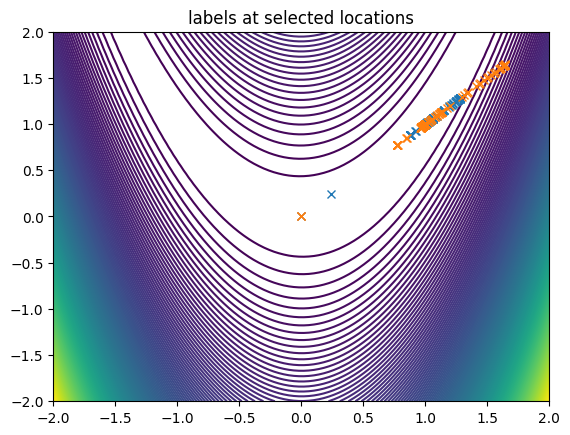

Iteration 		x 		Objective 		Alpha
0 	[0, 0] 	1 	None
1 	[0.24315331 0.        ] 	1 	0.12157665459056936
2 	[1.15396335 1.29384742] 	0.9223761142488893 	0.10941898913151243
3 	[1.14405025 1.34519516] 	0.1664677682810376 	0.001996678111016037
4 	[1.21127854 1.44012406] 	0.15284052853927993 	0.005726416897022355
5 	[1.20414675 1.47413799] 	0.117925948428339 	0.0017970102999144335
6 	[1.24488439 1.53103584] 	0.10008795136715676 	0.00515377520732012
7 	[1.23945641 1.55477802] 	0.09494229040240733 	0.0017970102999144335
8 	[1.2672026  1.59285838] 	0.09166003888777333 	0.004638397686588107
9 	[1.26345001 1.60764477] 	0.08815205841235021 	0.0016173092699229901
10 	[1.27789317 1.62686045] 	0.08226285287701846 	0.0041745579179292966
11 	[1.27575308 1.63396331] 	0.08100748867162973 	0.0016173092699229901
12 	[1.28214583 1.64188244] 	0.0801580399633991 	0.003757102126136367
13 	[1.28117563 1.64414863] 	0.08001248280555599 	0.0014555783429306911
14 	[1.28236668 1.64524477] 	0.07980919709902151 	0.0

In [8]:
plot_travel_path_countour(x_values, lambdified_fn)

pretty_output(x_values, obj_values, alphas)

# Newton's Method

In [9]:
#x_values, obj_values, alphas = newton(x, fn, lambdified_fn, lambdified_grad, initial_x, armijo_search)
x_values, obj_values, alphas = newton(x, fn, lambdified_fn, lambdified_grad, initial_x, exact_search)

---------------- ITERATION 0 Obj: 1 x: [0, 0]----------------
---------------- ITERATION 1 Obj: 0.9736934450193966 x: [0.25418658 0.        ]----------------
---------------- ITERATION 2 Obj: 0.4727058230724594 x: [0.31311383 0.10102893]----------------
---------------- ITERATION 3 Obj: 0.46438168060533236 x: [0.5437765  0.24507255]----------------
---------------- ITERATION 4 Obj: 0.16992756250230817 x: [0.58889003 0.34981827]----------------
---------------- ITERATION 5 Obj: 0.16863857663926327 x: [0.78192577 0.57661105]----------------
---------------- ITERATION 6 Obj: 0.035884486729816444 x: [0.8110175  0.65905363]----------------
---------------- ITERATION 7 Obj: 0.03468665523565642 x: [0.9468934  0.87875596]----------------
---------------- ITERATION 8 Obj: 0.001722951664373401 x: [0.95851352 0.91861313]----------------
---------------- ITERATION 9 Obj: 0.00025845245387823605 x: [0.99850514 0.99541184]----------------
---------------- ITERATION 10 Obj: 1.3157506514170992e-07 x: [

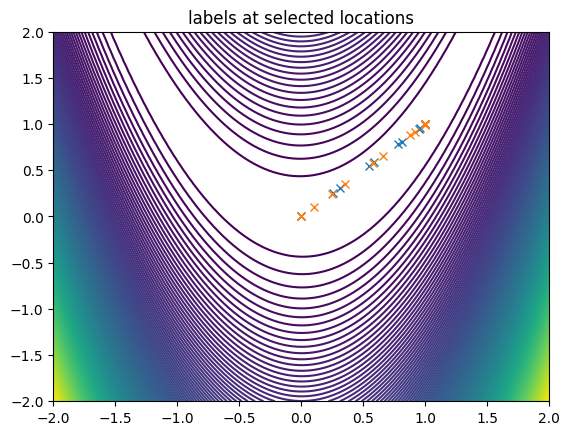

Iteration 		x 		Objective 		Alpha
0 	[0, 0] 	1 	None
1 	[0.25418658 0.        ] 	0.9736934450193966 	0.25418658283290013
2 	[0.31311383 0.10102893] 	0.4727058230724594 	1.1
3 	[0.5437765  0.24507255] 	0.46438168060533236 	0.13508517176729928
4 	[0.58889003 0.34981827] 	0.16992756250230817 	1.1
5 	[0.78192577 0.57661105] 	0.16863857663926327 	0.1853020188851842
6 	[0.8110175  0.65905363] 	0.035884486729816444 	1.0618033988749895
7 	[0.9468934  0.87875596] 	0.03468665523565642 	0.5314410000000002
8 	[0.95851352 0.91861313] 	0.001722951664373401 	1
9 	[0.99850514 0.99541184] 	0.00025845245387823605 	0.9900000000000001
10 	[0.99963749 0.99927384] 	1.3157506514170992e-07 	1
11 	[0.99999991 0.99999968] 	1.733743381269639e-12 	1
12 	[1. 1.] 	6.0289003323344995e-24 	1


In [10]:
plot_travel_path_countour(x_values, lambdified_fn)

pretty_output(x_values, obj_values, alphas)

# Davidon-Fletcher-Poweel (DFP)

In [11]:
#x_values, obj_values, alphas = dfp(lambdified_fn, lambdified_grad, initial_x, armijo_search)
x_values, obj_values, alphas = dfp(lambdified_fn, lambdified_grad, initial_x, exact_search)

---------------- ITERATION 0 Obj: 1 x: [0, 0]----------------
---------------- ITERATION 1 Obj: 0.9223761142488893 x: [0.24315331 0.        ]----------------
---------------- ITERATION 2 Obj: 0.8897276628674557 x: [0.43221032 0.11148361]----------------
---------------- ITERATION 3 Obj: 0.6614249030193176 x: [0.40412287 0.21866467]----------------
---------------- ITERATION 4 Obj: 0.30929996269934057 x: [0.44397328 0.1959536 ]----------------
---------------- ITERATION 5 Obj: 0.2708428784786271 x: [0.4877458  0.22870983]----------------
---------------- ITERATION 6 Obj: 0.25813827651021315 x: [0.56634668 0.29427536]----------------
---------------- ITERATION 7 Obj: 0.23416564745194446 x: [0.53549773 0.27319194]----------------
---------------- ITERATION 8 Obj: 0.21958424822423822 x: [0.54392104 0.28509081]----------------
---------------- ITERATION 9 Obj: 0.1442756864091614 x: [0.62044081 0.3863977 ]----------------
---------------- ITERATION 10 Obj: 0.07868863920392812 x: [0.73657887 

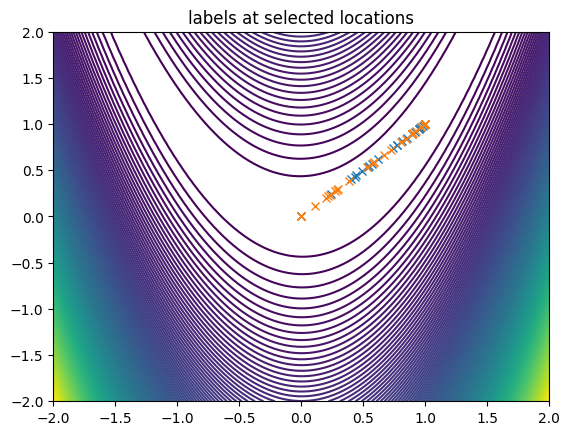

Iteration 		x 		Objective 		Alpha
0 	[0, 0] 	1 	None
1 	[0.24315331 0.        ] 	1 	0.12157665459056936
2 	[0.43221032 0.11148361] 	0.9223761142488893 	0.13508517176729928
3 	[0.40412287 0.21866467] 	0.8897276628674557 	0.9900000000000001
4 	[0.44397328 0.1959536 ] 	0.6614249030193176 	1
5 	[0.4877458  0.22870983] 	0.30929996269934057 	1.1
6 	[0.56634668 0.29427536] 	0.2708428784786271 	0.9900000000000001
7 	[0.53549773 0.27319194] 	0.25813827651021315 	1.1
8 	[0.54392104 0.28509081] 	0.23416564745194446 	1.1
9 	[0.62044081 0.3863977 ] 	0.21958424822423822 	1.1
10 	[0.73657887 0.53290585] 	0.1442756864091614 	1.1
11 	[0.77109878 0.58017536] 	0.07868863920392812 	0.9900000000000001
12 	[0.77452945 0.58780842] 	0.07318354738255994 	1.1
13 	[0.81427772 0.6639885 ] 	0.06544762519616268 	1.1
14 	[0.85050297 0.72453038] 	0.034581177389436925 	1.1
15 	[0.95376271 0.89626516] 	0.022487444374531363 	0.5314410000000002
16 	[0.89600324 0.80268228] 	0.020088935375372183 	0.9900000000000001
17 	[0.

In [12]:
plot_travel_path_countour(x_values, lambdified_fn)

pretty_output(x_values, obj_values, alphas)

# Broyden-Fletcher-Goldfarb-Shanno (BFGS)

In [13]:
#x_values, obj_values, alphas = bfgs(lambdified_fn, lambdified_grad, initial_x, armijo_search)
x_values, obj_values, alphas = bfgs(lambdified_fn, lambdified_grad, initial_x, exact_search)

---------------- ITERATION 0 Obj: 1 x: [0, 0]----------------
---------------- ITERATION 1 Obj: 0.9223761142488893 x: [0.24315331 0.        ]----------------
---------------- ITERATION 2 Obj: 0.8928073936291196 x: [0.38557428 0.07688393]----------------
---------------- ITERATION 3 Obj: 0.7563932589120096 x: [0.40626912 0.2286059 ]----------------
---------------- ITERATION 4 Obj: 0.29823195962078425 x: [0.45439414 0.20413693]----------------
---------------- ITERATION 5 Obj: 0.25821726209671836 x: [0.50297396 0.24240813]----------------
---------------- ITERATION 6 Obj: 0.23219508276462064 x: [0.61249618 0.34650966]----------------
---------------- ITERATION 7 Obj: 0.17374844689890284 x: [0.58911938 0.34004341]----------------
---------------- ITERATION 8 Obj: 0.12978736730252657 x: [0.6412594  0.40790825]----------------
---------------- ITERATION 9 Obj: 0.11606642799630024 x: [0.77648213 0.57721337]----------------
---------------- ITERATION 10 Obj: 0.0764869004325172 x: [0.72359636

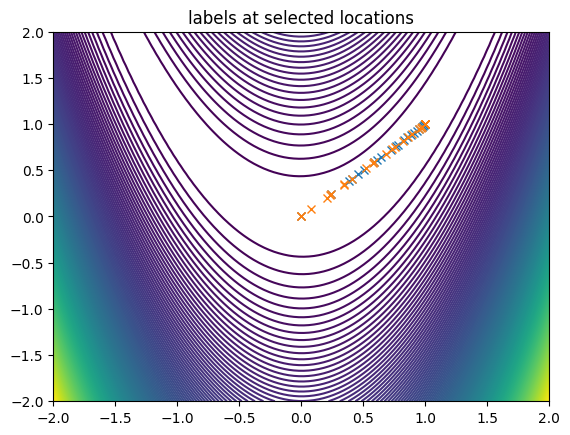

Iteration 		x 		Objective 		Alpha
0 	[0, 0] 	1 	None
1 	[0.24315331 0.        ] 	1 	0.12157665459056936
2 	[0.38557428 0.07688393] 	0.9223761142488893 	0.020275559590445278
3 	[0.40626912 0.2286059 ] 	0.8928073936291196 	0.9
4 	[0.45439414 0.20413693] 	0.7563932589120096 	1
5 	[0.50297396 0.24240813] 	0.29823195962078425 	1.1
6 	[0.61249618 0.34650966] 	0.25821726209671836 	0.9900000000000001
7 	[0.58911938 0.34004341] 	0.23219508276462064 	1.1
8 	[0.6412594  0.40790825] 	0.17374844689890284 	1.1
9 	[0.77648213 0.57721337] 	0.12978736730252657 	0.81
10 	[0.72359636 0.52265399] 	0.11606642799630024 	0.9900000000000001
11 	[0.76659747 0.58494767] 	0.0764869004325172 	1.1
12 	[0.88036771 0.75498512] 	0.05521876656194649 	0.7290000000000001
13 	[0.82586479 0.68041254] 	0.05456097290413409 	0.9900000000000001
14 	[0.85555371 0.72969947] 	0.030592066765726265 	1.1
15 	[0.95186158 0.89278929] 	0.021381237111268946 	0.9900000000000001
16 	[0.90706189 0.82180806] 	0.019876694630269552 	0.990000

In [14]:
plot_travel_path_countour(x_values, lambdified_fn)

pretty_output(x_values, obj_values, alphas)